In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.ticker as mtick


In [84]:
#Load Dataset
df = pd.read_csv("Supermarket Customers.csv", sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Business Question
Apa saja karakteristik pelanggan yang memengaruhi keberhasilan dalam melakukan promosi?
## Hipotesis Penelitian
- H1: Pendapatan pelanggan (Income) berpengaruh terhadap kemungkinan mereka merespons promosi terakhir.
- H2: Pelanggan yang secara historis sering memanfaatkan diskon (NumDealsPurchases) lebih cenderung merespons promosi terakhir.
- H3: Pelanggan yang lebih sering berbelanja secara online (NumWebPurchases) lebih cenderung merespons promosi terakhir.
- H4: Pelanggan yang pernah merespons promosi sebelumnya (HistoryResponse) lebih cenderung merespons promosi terakhir.
- H5: Status pernikahan (Marital_Status) dan tingkat pendidikan (Education) berpengaruh terhadap kemungkinan pelanggan merespons promosi terakhir.

# Data Cleaning & Explorasi Awal
### 1. Mengecek Tipe Data

In [85]:
print("\nJumlah Baris dan Kolom pada Dataset:", df.shape)
print("\nInfo dari Dataset:")
df.info()


Jumlah Baris dan Kolom pada Dataset: (2240, 29)

Info dari Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds       

Tujuan dari mengecek tipe data yaitu agar data di suatu kolom sudah sesuai dengan tipe data yang seharusnya, seperti kolom Year_Birth tipe datanya sudah sesuai berupa Integer

In [86]:
print("\nStatistik Deskriptif Dataset:")
df.describe()


Statistik Deskriptif Dataset:


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Tujuan dari membuat statistik deskriptif, agar kita bisa mendapatkan gambaran terkait bentuk data secara keseluruhan, dan sebagai panduan juga ketika kita melakukan analisis.

### 2. Missing Value

In [87]:
df = df.dropna(subset=['Income'])

Kenapa kolom 'Income' dilakukan cleaning missing value, karena saat dilakukan pengecekan mengguakan fungsi df.isnull(), ditemukan missing value sebanyak 24 row

In [88]:
print("\nJumlah Missing Values Tiap Kolom:")
print(df.isnull().sum())


Jumlah Missing Values Tiap Kolom:
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


Ditemukan 24 missing value pada data income. Karena jumlahnya sedikit, 24 row tersebut kami drop sehingga tidak membuat datanya menjadi bias. Ketika sudah dilakukan cleaning menggunakan df.dropna, data missing value untuk semua kolom sudah tidak ada.

### 3. Mengecek Data Duplikat

In [89]:
df['ID'].duplicated().sum()

np.int64(0)

Dataset yang diuji tidak memiliki nilai duplikat agar analisisnya tidak menjadi bias

### 4. Memastikan data di kolom 'Response' hanya bernilai '0 dan 1'

In [90]:
print(df['Response'].value_counts(dropna=False))

Response
0    1883
1     333
Name: count, dtype: int64


Hal ini bertujuan untuk memastikan bahwa tidak ada data lain yang tidak sesuai, terdapat di kolom response. Karena data di kolom response akan menjadi variabel utama dalam melakukan analisis ini

In [91]:
print(df[~df['Response'].isin([0,1])]['Response'].unique())

[]


Data pada kolom respon sudah sesuai dengan value yang diharapkan, yaitu hanya bernilai 0 dan 1

#### 5. Membersihkan kategori 'ABSURD' dan 'YOLO' pada data Marital_Status

In [92]:
df = df[~df['Marital_Status'].isin(['Absurd', 'YOLO'])]

In [93]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


Kenapa dihapus:
Karena "Absurd" tidak memiliki arti relevan untuk bisnis maupun analisis perilaku pelanggan.
Bisa mengganggu akurasi analisis, karena dihitung sama dengan kategori valid seperti "Married" atau "Single".
Bisa mengaburkan insight, terutama saat mencari hubungan antara status pernikahan dan respons promosi.

### 6. Data Outlier: 
#### a. Data Income

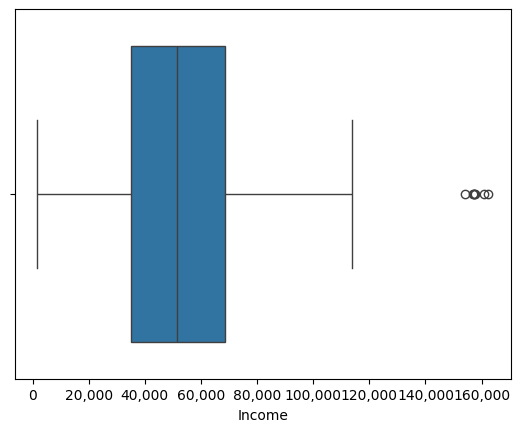

In [165]:
df['Income'].describe()
sns.boxplot(x=df['Income'])
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.show()

Ditemukan satu data outlier ekstrem pada kolom Income dengan nilai sebesar 666.666 yang jauh melebihi nilai lainnya. Nilai ini kemungkinan besar merupakan kesalahan input atau nilai dummy, dan secara statistik sangat memengaruhi distribusi data, guna menjaga validitas analisis maka diputuskan untuk menghapus data tersebut.

In [95]:
# Hapus Outlier
df = df[df['Income'] != 666666]

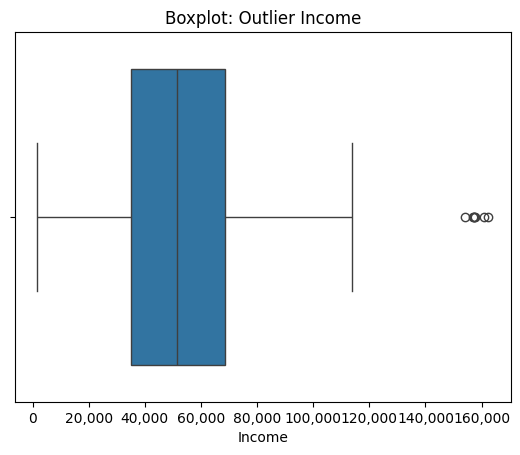

In [161]:
# Outlier setelah hapus data ekstrim
df['Income'].describe()
sns.boxplot(x=df['Income'])
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.title('Boxplot: Outlier Income')
plt.show()

Setelah menghapus satu outlier ekstrem pada kolom Income (666.666), data menunnjukkan sekitar 6-7 outlier high-income yang masih tergolong wajar.
Distribusi Income tetap menunjukkan skew ke kanan, dengan mayoritas pelanggan berada di rentang 35.000–70.000.
Data ini kini siap digunakan untuk analisis lebih lanjut seperti uji hipotesis tanpa khawatir hasilnya bias oleh outlier ekstrm.

In [97]:
# Menggunakan IQR
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
print(f"Batas bawah: {lower_bound:.2f}, Batas atas: {upper_bound:.2f}")

# cek outlier
outliers_income = df[(df['Income'] < lower_bound) | (df['Income'] > upper_bound)]
print(f"Jumlah outlier Income: {len(outliers_income)}")
display(outliers_income[['ID', 'Income']])


Q1: 35221.00, Q3: 68487.00, IQR: 33266.00
Batas bawah: -14678.00, Batas atas: 118386.00
Jumlah outlier Income: 7


,ID,Income
164,8475,157243.0
617,1503,162397.0
655,5555,153924.0
687,1501,160803.0
1300,5336,157733.0
1653,4931,157146.0
2132,11181,156924.0


Berdasarkan metode IQR, ditemukan 7 pelanggan dengan pendapatan di atas Rp 118.291 yang menjadi outlier. 7 pelanggan ini masih menunjukkan rentang pendapatan yang wajar dan berpotensi menjadi segmen pelanggan dengan daya beli tinggi, tidak seperti data sebelumnya yang memiliki outlier ekstrim. Sehingga 7 data outlier itu tetap dipertahankan dalam analisis, namun dicatat sebagai pelanggan high-income untuk pertimbangan segmentasi lebih lanjut.

#### b. Data NumDealsPurchases

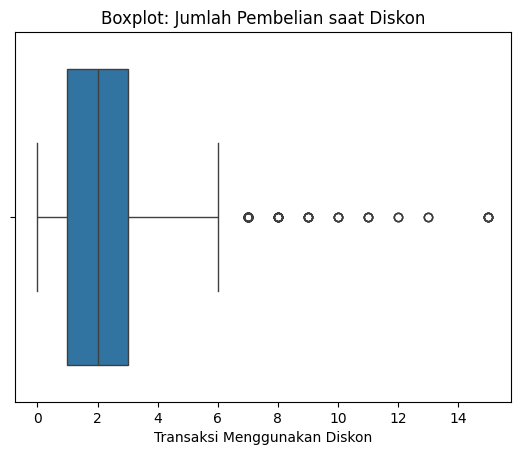

In [162]:
sns.boxplot(x=df['NumDealsPurchases'])
plt.title('Boxplot: Jumlah Pembelian saat Diskon')
plt.xlabel('Transaksi Menggunakan Diskon')
plt.show()

In [99]:
# Menggunakan IQR
Q1 = df['NumDealsPurchases'].quantile(0.25)
Q3 = df['NumDealsPurchases'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"[NumDealsPurchases] Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
print(f"Batas bawah: {lower_bound:.2f}, Batas atas: {upper_bound:.2f}")

outliers_deals = df[(df['NumDealsPurchases'] < lower_bound) | (df['NumDealsPurchases'] > upper_bound)]
print(f"Jumlah outlier pada NumDealsPurchases: {len(outliers_deals)}")
display(outliers_deals[['ID', 'NumDealsPurchases']])


[NumDealsPurchases] Q1: 1.00, Q3: 3.00, IQR: 2.00
Batas bawah: -2.00, Batas atas: 6.00
Jumlah outlier pada NumDealsPurchases: 84


,ID,NumDealsPurchases
21,5376,15
24,1409,7
49,6566,9
54,9381,7
69,1357,7
...,...,...
2090,4865,7
2144,5136,7
2198,2632,7
2226,4478,8


Berdasarkan metode IQR, ditemukan 84 pelanggan yang memiliki jumlah pembelian saat diskon (NumDealsPurchases) melebihi batas atas normal (>6 kali). Namun, nilai-nilai ini masih dalam batas wajar dan mencerminkan pelanggan yang sangat responsif terhadap diskon. Data ini tetap dipertahankan karena merepresentasikan segmen pelanggan yang potensial untuk promosi berbasis diskon.

#### c. Data NumWebPurchases

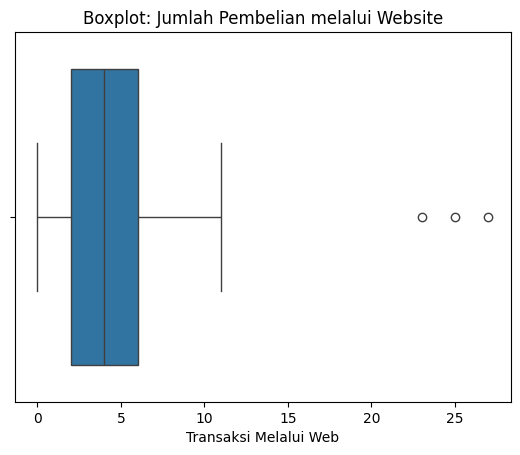

In [163]:
sns.boxplot(x=df['NumWebPurchases'])
plt.title('Boxplot: Jumlah Pembelian melalui Website')
plt.xlabel('Transaksi Melalui Web')
plt.show()

In [101]:
# Menggunakan IQR
Q1 = df['NumWebPurchases'].quantile(0.25)
Q3 = df['NumWebPurchases'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"[NumWebPurchases] Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
print(f"Batas bawah: {lower_bound:.2f}, Batas atas: {upper_bound:.2f}")

outliers_web = df[(df['NumWebPurchases'] < lower_bound) | (df['NumWebPurchases'] > upper_bound)]
print(f"Jumlah outlier NumWebPurchases: {len(outliers_web)}")
display(outliers_web[['ID', 'NumWebPurchases']])


[NumWebPurchases] Q1: 2.00, Q3: 6.00, IQR: 4.00
Batas bawah: -4.00, Batas atas: 12.00
Jumlah outlier NumWebPurchases: 3


,ID,NumWebPurchases
1806,6237,23
1898,4619,27
1975,10311,25


Ditemukan 3 pelanggan yang memiliki jumlah pembelian online (NumWebPurchases) sangat tinggi (>12 kali), yakni antara 23 hingga 27 pembelian. Nilai ini masih tergolong valid dan menggambarkan perilaku pelanggan digital yang sangat aktif. Data ini tetap dipertahankan untuk mempertahankan keragaman karakteristik pelanggan, dan dapat dimanfaatkan untuk strategi promosi digital yang lebih spesifik.

#### d. Data HistoryRespons

In [102]:
# membuat kolom History Respons
historyaccepted = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df['HistoryRespons'] = df[historyaccepted].sum(axis=1)

C:\Users\Herry Triatmojo\AppData\Local\Temp\ipykernel_23296\1447285103.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HistoryRespons'] = df[historyaccepted].sum(axis=1)


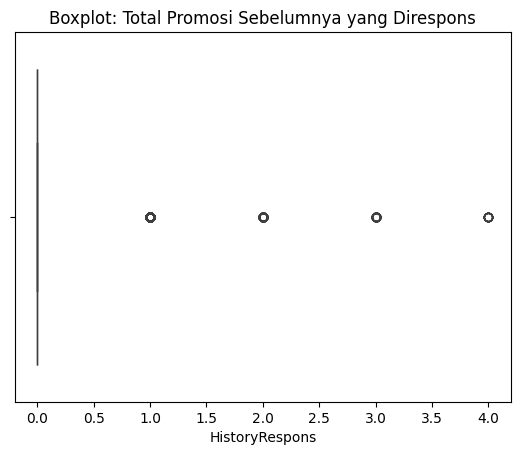

In [103]:
sns.boxplot(x=df['HistoryRespons'])
plt.title('Boxplot: Total Promosi Sebelumnya yang Direspons')
plt.xlabel('HistoryRespons')
plt.show()


In [104]:
# Menggunakan IQR
# Cek outlier menggunakan metode IQR untuk kolom HistoryRespons
Q1 = df['HistoryRespons'].quantile(0.25)
Q3 = df['HistoryRespons'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"[HistoryRespons] Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
print(f"Batas bawah: {lower_bound:.2f}, Batas atas: {upper_bound:.2f}")

# Deteksi outlier
outliers_historyrespons = df[(df['HistoryRespons'] < lower_bound) | (df['HistoryRespons'] > upper_bound)]
print(f"Jumlah outlier pada HistoryRespons: {len(outliers_historyrespons)}")

# Tampilkan data outlier
display(outliers_historyrespons[['ID', 'HistoryRespons']])


[HistoryRespons] Q1: 0.00, Q3: 0.00, IQR: 0.00
Batas bawah: 0.00, Batas atas: 0.00
Jumlah outlier pada HistoryRespons: 458


,ID,HistoryRespons
9,5899,1
15,2114,2
18,6565,1
22,1993,1
29,1966,1
...,...,...
2221,7366,2
2224,4286,1
2230,7004,1
2236,4001,1


Mayoritas pelanggan tidak pernah merespons promosi sebelumnya. Namun, dari beberapa pelanggan yang merespons promosi sebelumnya, proporsi mereka dalam merespons promosi terakhir lebih tinggi. Ini menjadi sinyal bahwa riwayat respons terhadap promosi sebelumnya menjadi indikator penting dalam melakukan promosi selanjutnya.

#### e. Data Recency

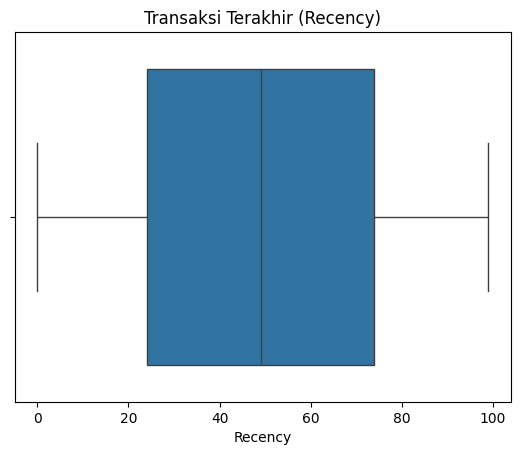

In [164]:
sns.boxplot(x=df['Recency'])
plt.title('Transaksi Terakhir (Recency)')
plt.xlabel('Recency')
plt.show()


In [106]:
# Menggunakan IQR
Q1 = df['Recency'].quantile(0.25)
Q3 = df['Recency'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"[Recency] Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
print(f"Batas bawah: {lower_bound:.2f}, Batas atas: {upper_bound:.2f}")

outliers_recency = df[(df['Recency'] < lower_bound) | (df['Recency'] > upper_bound)]
print(f"Jumlah outlier pada Data Recency: {len(outliers_recency)}")
display(outliers_recency[['ID', 'Recency']])


[Recency] Q1: 24.00, Q3: 74.00, IQR: 50.00
Batas bawah: -51.00, Batas atas: 149.00
Jumlah outlier pada Data Recency: 0


,ID,Recency


Berdasarkan metode IQR, tidak ditemukan outlier pada kolom Recency. Seluruh nilai berada dalam rentang yang wajar (0–99 hari), yang mencerminkan stabilitas dan konsistensi dalam perilaku waktu transaksi terakhir pelanggan. Oleh karena itu, tidak diperlukan perlakuan khusus terhadap kolom ini.



## Visualisasi Data Cleaning

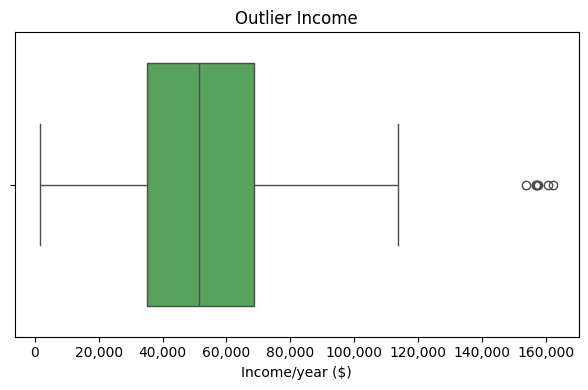

In [107]:
#Outlier Income
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Income'], color='#4CAF50') 
plt.title('Outlier Income')
plt.xlabel('Income/year ($)')
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.tight_layout()
plt.savefig("OutlierIncome.png", dpi=300)
plt.show()


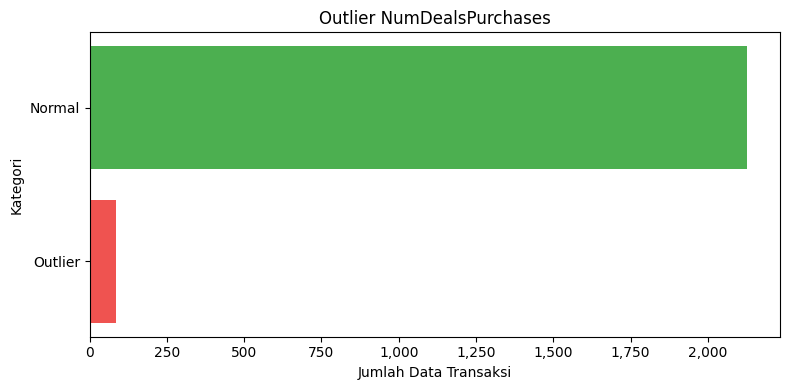

In [108]:
outlier_count = df[df['NumDealsPurchases'] > 6].shape[0]
inlier_count = df.shape[0] - outlier_count

plt.figure(figsize=(8, 4))
plt.barh(['Outlier', 'Normal'], [outlier_count, inlier_count], color=['#EF5350', '#4CAF50'])
plt.title('Outlier NumDealsPurchases')
plt.ylabel('Kategori')
plt.xlabel('Jumlah Data Transaksi')
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.tight_layout()
plt.savefig("outlierNumDealsPurchases.png", dpi=300)
plt.show()


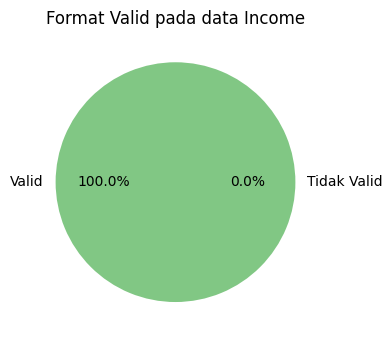

In [109]:
invalid_income = df[df['Income'].apply(lambda x: isinstance(x, str))]
valid_count = df.shape[0] - len(invalid_income)

plt.figure(figsize=(4,4))
plt.pie([len(invalid_income), valid_count],
        labels=['Tidak Valid', 'Valid'],
        autopct='%1.1f%%',
        colors=['#FF7043', '#81C784'])
plt.title('Format Valid pada data Income')
plt.tight_layout() 
plt.savefig("pie_invalid_income.png", dpi=300)
plt.show()


# Eksplorasi Data

### Distribusi Target (response)

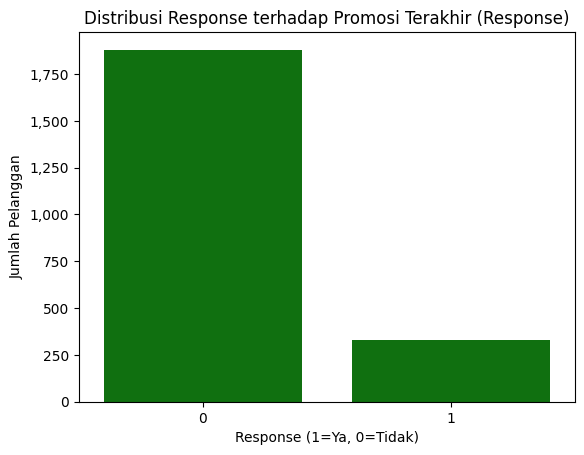

In [110]:
sns.countplot(x='Response', data=df, color='green')
plt.title("Distribusi Response terhadap Promosi Terakhir (Response)")
plt.xlabel("Response (1=Ya, 0=Tidak)")
plt.ylabel("Jumlah Pelanggan")
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{y:,.0f}'))
plt.savefig('DistribusiTarget.png', dpi=300, bbox_inches='tight')
plt.show()


In [111]:
respon_rate = df['Response'].value_counts(normalize=True)
print(respon_rate)

Response
0    0.850294
1    0.149706
Name: proportion, dtype: float64


Distribusi variabel target menunjukkan bahwa hanya sekitar 15% pelanggan yang merespons promosi terakhir, sementara 85% sisanya tidak memberikan respons. Tingkat respons yang rendah ini menandakan bahwa promosi yang dijalankan sebelumnya belum optimal. Oleh karena itu, analisis lebih lanjut difokuskan pada menggali karakteristik pelanggan yang merespons, agar promosi mendatang bisa lebih tepat sasaran.

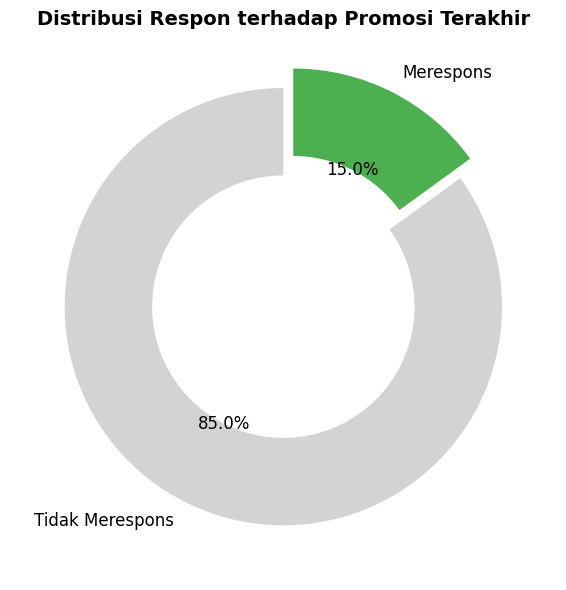

In [112]:
labels = ['Tidak Merespons', 'Merespons']
sizes = [85, 15]
colors = ['#D3D3D3', '#4CAF50']  
explode = (0, 0.1)  

fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(
    sizes, 
    labels=labels, 
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.4),  # Membuatnya jadi donut
    explode=explode,
    textprops={'fontsize': 12}
)

ax.set_title('Distribusi Respon terhadap Promosi Terakhir', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig("donut_distribusi_response.png", dpi=300)  # bisa diubah nama dan folder
plt.show()

## Analisis Numerik


### 1. Analisis Numerik: Income Terhadap Response

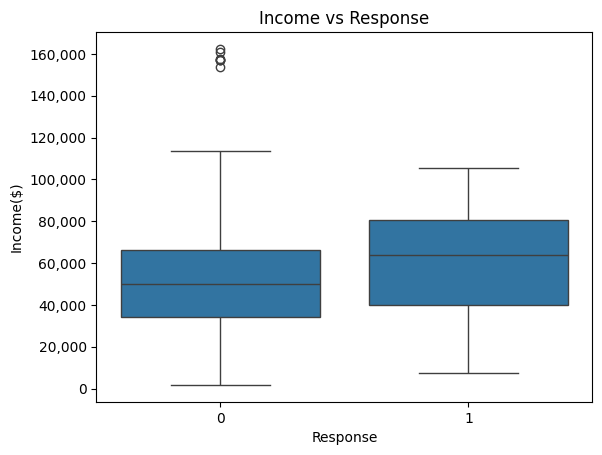

In [113]:
sns.boxplot(x='Response', y='Income', data=df)
plt.title("Income vs Response")
plt.ylabel("Income($)")
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{y:,.0f}'))
plt.show()

#### Insight Awal: Income vs Response
- Hasil visualisasi boxplot menunjukkan bahwa terdapat perbedaan distribusi pendapatan (Income) antara pelanggan yang merespons promosi terakhir (`Response = 1`) dan yang tidak (`Response = 0`).
- Pelanggan yang merespons promosi (`Response = 1`) cenderung memiliki median pendapatan yang lebih tinggi dibandingkan yang tidak merespons. Selain itu, sebaran pendapatan pada kelompok respons juga lebih lebar, menunjukkan keragaman karakteristik income yang merespons.
- Insight ini memberikan indikasi awal bahwa pendapatan bisa menjadi salah satu faktor yang memengaruhi keputusan pelanggan untuk merespons promosi terakhir.
- Selanjutnya, uji statistik dilakukan untuk memastikan apakah perbedaan ini signifikan secara statistik.

### 2. Analisis Numerik: NumDealsPurchases Terhadap Response

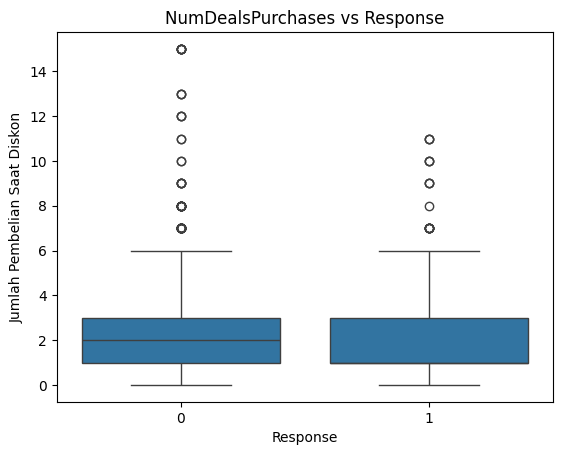

In [114]:
sns.boxplot(x='Response', y='NumDealsPurchases', data=df)
plt.title('NumDealsPurchases vs Response')
plt.xlabel('Response')
plt.ylabel('Jumlah Pembelian Saat Diskon')
plt.show()


#### Insight Awal: NumDealsPurchases vs Response
- Hasil boxplot menunjukkan bahwa distribusi jumlah pembelian menggunakan diskon (`NumDealsPurchases`) terlihat hampir sama antara pelanggan yang merespons promosi terakhir (Response = 1) dan yang tidak (Response = 0).
- Median dan rentang nilai berada di kisaran yang serupa, yaitu antara 1 hingga 4. Meski terdapat beberapa outlier (pelanggan dengan 10+ transaksi diskon), sebaran umumnya menunjukkan bahwa faktor ini kemungkinan **bukan pembeda kuat** dalam keberhasilan promosi terakhir.
- Diperlukan uji statistik (t-test) untuk memastikan apakah perbedaan ini signifikan atau tidak secara statistik.


### 3. Analisis Numerik: NumWebPurchases terhadap Response

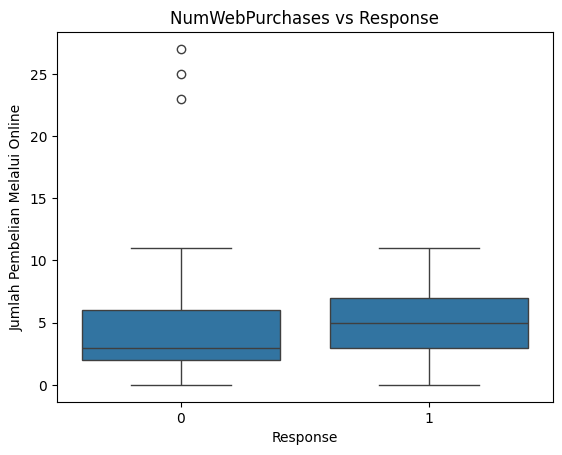

In [115]:
sns.boxplot(x='Response', y='NumWebPurchases', data=df)
plt.title('NumWebPurchases vs Response')
plt.xlabel('Response')
plt.ylabel('Jumlah Pembelian Melalui Online')
plt.show()


#### Analisis Numerik: NumWebPurchases vs Response

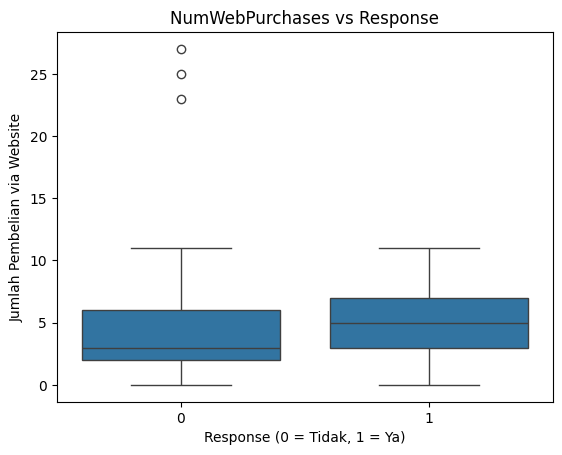

In [116]:
sns.boxplot(x='Response', y='NumWebPurchases', data=df)
plt.title('NumWebPurchases vs Response')
plt.xlabel('Response (0 = Tidak, 1 = Ya)')
plt.ylabel('Jumlah Pembelian via Website')
plt.show()

#### Insight Awal: NumWebPurchases vs Response
- Visualisasi boxplot menunjukkan bahwa pelanggan yang merespons promosi terakhir (`Response = 1`) cenderung memiliki jumlah pembelian via website (`NumWebPurchases`) yang lebih tinggi dibandingkan pelanggan yang tidak merespons.
- Meskipun perbedaannya tidak ekstrem, median dan sebaran data untuk kelompok yang merespons tampak sedikit lebih tinggi. Hal ini mendukung dugaan bahwa pelanggan yang aktif berbelanja online lebih mungkin untuk merespons promosi digital.
- Selanjutnya akan dilakukan uji statistik (t-test) untuk mengetahui apakah perbedaan ini signifikan secara statistik.


### 4. Analisis Numerik: HistoryRespons Terhadap Response

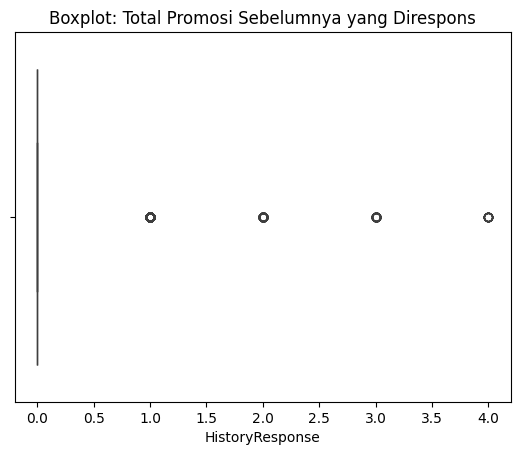

In [117]:
sns.boxplot(x=df['HistoryRespons'])
plt.title('Boxplot: Total Promosi Sebelumnya yang Direspons')
plt.xlabel('HistoryResponse')
plt.show()


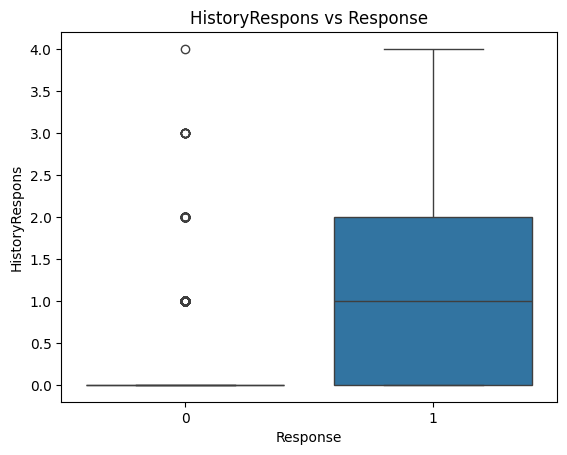

In [118]:
sns.boxplot(x='Response', y='HistoryRespons', data=df)
plt.title('HistoryRespons vs Response')
plt.show()


Untuk mengetahui pengaruh kampanye sebelumnya terhadap keputusan pelanggan menerima promosi terakhir, dibuat kolom baru HistoryRespons yang merupakan jumlah dari lima kampanye sebelumnya (AcceptedCmp1–5). Kolom ini digunakan untuk melihat apakah riwayat penerimaan promosi berpengaruh terhadap respons pada promosi terakhir.

#### Insight Awal: HistoryRespons vs Response
Dari visualisasi boxplot antara HistoryRespons dan Response, terlihat bahwa pelanggan yang merespons promosi terakhir (Response = 1) memiliki jumlah promosi sebelumnya yang diterima lebih tinggi dibanding yang tidak merespons. Mayoritas pelanggan yang tidak merespons bahkan belum pernah menerima atau hanya satu kali menerima promosi sebelumnya. Temuan ini mengindikasikan adanya potensi hubungan antara pengalaman promosi sebelumnya dengan keputusan untuk merespons promosi selanjutnya.

## 5. Analisis Numerik: Recency Terhadap Response

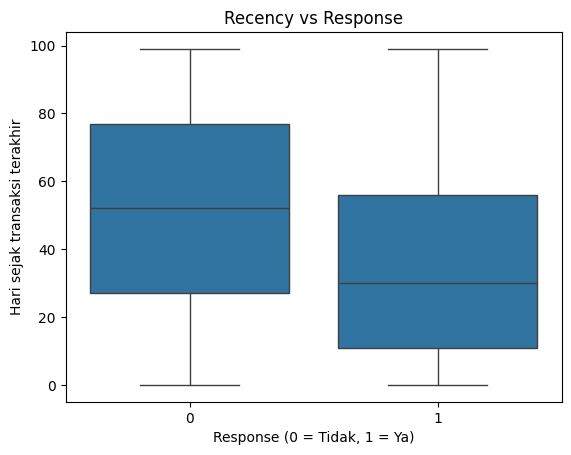

In [119]:
sns.boxplot(x='Response', y='Recency', data=df)
plt.title('Recency vs Response')
plt.xlabel('Response (0 = Tidak, 1 = Ya)')
plt.ylabel('Hari sejak transaksi terakhir')
plt.show()


### Insight Awal: Recency vs Response
Visualisasi boxplot antara Recency dan Response menunjukkan bahwa pelanggan yang merespons promosi terakhir (Response = 1) memiliki jarak waktu transaksi terakhir yang lebih dekat (recency lebih rendah). Sebaliknya, pelanggan yang tidak merespons promosi cenderung memiliki recency yang lebih tinggi. Hal ini mengindikasikan bahwa pelanggan yang masih aktif atau baru saja melakukan transaksi memiliki kecenderungan lebih tinggi untuk merespons promosi perusahaan.

Meskipun Recency tidak termasuk dalam hipotesis utama yang diuji secara statistik, analisis eksploratif menunjukkan bahwa pelanggan yang baru saja melakukan pembelian memiliki kecenderungan lebih tinggi untuk merespons promosi terakhir. Hal ini dapat dijadikan pertimbangan tambahan dalam strategi promosi, seperti memprioritaskan pelanggan yang masih aktif dalam 30 hari terakhir.

# Analisis Statistik / Uji Hipotesis

### 1. Uji Hipotesis 1: Income Terhadap Response

In [137]:
income_0 = df[df['Response'] == 0]['Income']
income_1 = df[df['Response'] == 1]['Income']
t_stat, p_val = stats.ttest_ind(income_0, income_1, nan_policy='omit')
print(f"[H1] T-test Income: p = {p_val:.10f}")
if p_val < 0.05:
    print("Kesimpulan: Ada perbedaan signifikan income berdasarkan Response")
else:
    print("Kesimpulan: Tidak ada perbedaan signifikan income berdasarkan Response")


[H1] T-test Income: p = 0.0000000000
Kesimpulan: Ada perbedaan signifikan income berdasarkan Response


### Visualisasi Hipotesis 1:

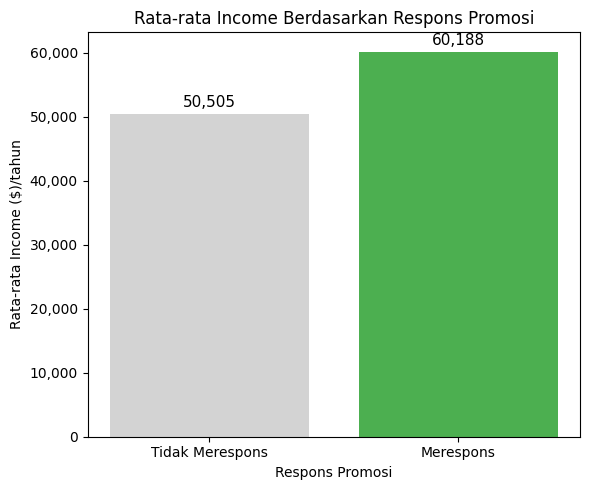

In [135]:
# Hitung rata-rata income berdasarkan Response
mean_income = df.groupby('Response')['Income'].mean()
colors = ['#D3D3D3', '#4CAF50']
plt.figure(figsize=(6,5))
bars = plt.bar(mean_income.index.astype(str), mean_income.values, color=colors)

# Label
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1000, f'{yval:,.0f}', ha='center', fontsize=11)

plt.xticks(ticks=[0,1], labels=['Tidak Merespons', 'Merespons'])
plt.xlabel('Respons Promosi')
plt.ylabel('Rata-rata Income ($)/tahun')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{y:,.0f}'))
plt.title('Rata-rata Income Berdasarkan Respons Promosi')
plt.tight_layout()

# visualisasi
plt.savefig("hipotesis_income_respons.png", dpi=300)
plt.show()


Pelanggan yang merespons promosi umumnya memiliki pendapatan lebih tinggi dibanding yang tidak merespons. Pelanggan dengan pendapatan lebih tinggi lebih cenderung merespons promosi dibandingkan pelanggan dengan pendapatan lebih rendah.

### 2. Uji Hipotesis 2: NumDealsPurchases Terhadap Response

In [136]:
deals_0 = df[df['Response'] == 0]['NumDealsPurchases']
deals_1 = df[df['Response'] == 1]['NumDealsPurchases']
t_stat, p_val = stats.ttest_ind(deals_0, deals_1)
print(f"[H2] Hasil T-test NumDealsPurchases: p = {p_val:.10f}")
if p_val < 0.05:
    print("Kesimpulan: Ada perbedaan signifikan pembelian diskon berdasarkan Response")
else:
    print("Kesimpulan: Tidak ada perbedaan signifikan pembelian diskon berdasarkan Response")


[H2] Hasil T-test NumDealsPurchases: p = 0.8803709603
Kesimpulan: Tidak ada perbedaan signifikan pembelian diskon berdasarkan Response


### Visualisasi Hipotesis 2

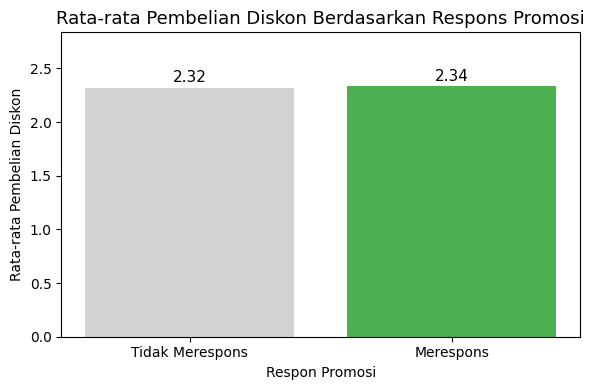

In [166]:
mean_numdealspurchases = df.groupby('Response')['NumDealsPurchases'].mean()
colors = ['#D3D3D3', '#4CAF50']
plt.figure(figsize=(6, 4))
bars = plt.bar(mean_numdealspurchases.index.astype(str), mean_numdealspurchases.values, color=colors)
ax = plt.gca()
ax.set_xticks([0, 1])
ax.set_xticklabels(['Tidak Merespons', 'Merespons'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, f'{yval:.2f}', ha='center', fontsize=11)
plt.title('Rata-rata Pembelian Diskon Berdasarkan Respons Promosi', fontsize=13)
plt.xlabel('Respon Promosi')
plt.ylabel('Rata-rata Pembelian Diskon')
plt.ylim(0, max(mean_numdealspurchases.values) + 0.5)
plt.tight_layout()

plt.savefig('hipotesis_diskon_respons_labeled.png', dpi=300)
plt.show()


Pelanggan menggunakan diskon yang merespons promosi melakukan rata-rata 2.34 kali pembelian diskon, sedangkan yang tidak merespons, juga mirip yaitu 2.32 kali. Hal ini menunjukkan bahwa intensitas pembelian diskon tidak cukup kuat menjadi indikator keberhasilan promosi terakhir.

### 3. Uji Hipotesis 3: NumWebPurchases Terhadap Response

In [124]:
web_0 = df[df['Response'] == 0]['NumWebPurchases']
web_1 = df[df['Response'] == 1]['NumWebPurchases']
t_stat, p_val = stats.ttest_ind(web_0, web_1)
print(f"[H3] T-test NumWebPurchases: p = {p_val:.10f}")
if p_val < 0.05:
    print("Kesimpulan: Ada perbedaan signifikan pembelian online berdasarkan Response")
else:
    print("Kesimpulan: Tidak ada perbedaan signifikan pembelian online berdasarkan Response")


[H3] T-test NumWebPurchases: p = 0.0000000000
Kesimpulan: Ada perbedaan signifikan pembelian online berdasarkan Response


### Visualisasi Hipotesis 3

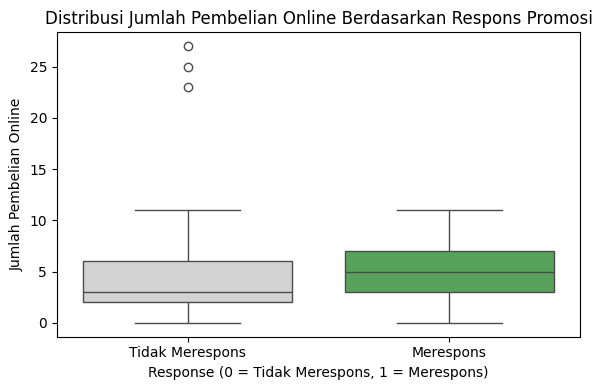

In [125]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Response', y='NumWebPurchases', data=df, hue='Response', palette={0:'#D3D3D3', 1:'#4CAF50'}, dodge=False, legend=False)
plt.title('Distribusi Jumlah Pembelian Online Berdasarkan Respons Promosi')
plt.xlabel('Response (0 = Tidak Merespons, 1 = Merespons)')
plt.ylabel('Jumlah Pembelian Online')
plt.xticks([0, 1], ['Tidak Merespons', 'Merespons'])
plt.tight_layout()
plt.savefig('hipotesis_numwebpurchases_response.png', dpi=300)
plt.show()


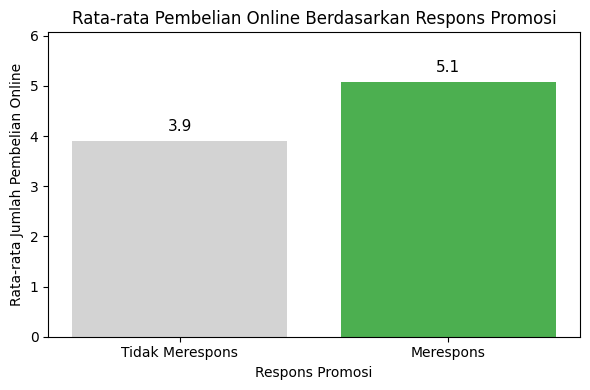

In [126]:
mean_webpurchases = df.groupby('Response')['NumWebPurchases'].mean()

colors = ['#D3D3D3', '#4CAF50']
plt.figure(figsize=(6, 4))
bars = plt.bar(mean_webpurchases.index.astype(str), mean_webpurchases.values, color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, f'{yval:.1f}', ha='center', fontsize=11)
plt.xticks(ticks=[0, 1], labels=['Tidak Merespons', 'Merespons'])
plt.xlabel('Respons Promosi')
plt.ylabel('Rata-rata Jumlah Pembelian Online')
plt.title('Rata-rata Pembelian Online Berdasarkan Respons Promosi')
plt.ylim(0, max(mean_webpurchases.values) + 1)
plt.tight_layout()
plt.savefig('hipotesis_numwebpurchases_response_bar.png', dpi=300)
plt.show()


Pada grafik ini, menunjukkan bahwa pelanggan yang merespons promosi rata-rata melakukan lebih banyak pembelian online dibandingkan yang tidak merespons.
Rata-rata transaksi online mereka mencapai 5.1 kali dibandingkan 3.9 kali.
Temuan ini diperkuat dengan hasil uji T-test yang menunjukkan p-value sangat kecil, menandakan perbedaan ini signifikan.
Insight ini menunjukkan bahwa pelanggan yang aktif secara online adalah target potensial untuk promosi berikutnya.

### 4. Uji Hipotesis 4: HistoryRespons Terhadap Response

In [127]:
cross_tab2 = pd.crosstab(df['HistoryRespons'], df['Response'])
chi2, p, dof, ex = stats.chi2_contingency(cross_tab2)
print(f"[H4] Chi-square HistoryRespons vs Response: p = {p:.10f}")
if p < 0.05:
    print("Kesimpulan: berpengaruh signifikan terhadap Response")
else:
    print("Kesimpulan: Tidak ada pengaruh signifikan History Response terhadap Response")


[H4] Chi-square HistoryRespons vs Response: p = 0.0000000000
Kesimpulan: berpengaruh signifikan terhadap Response


### Visualisasi Hipotesis 4

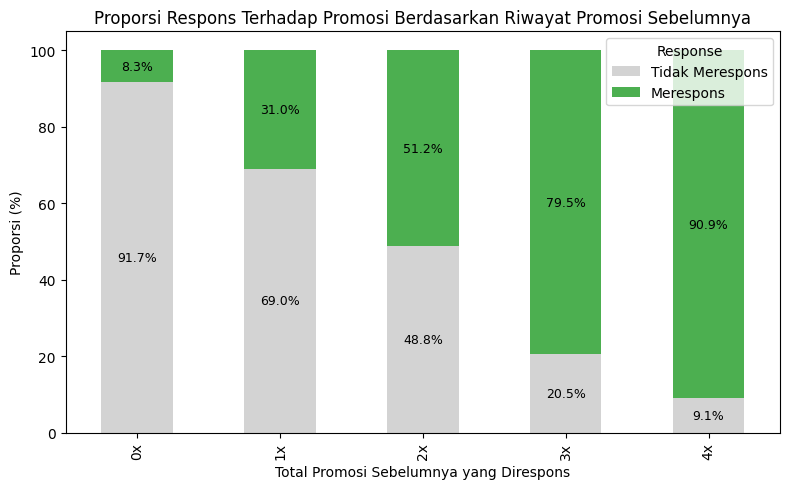

In [128]:
ct = pd.crosstab(df['HistoryRespons'], df['Response']) #crosstab
ct_percent = ct.div(ct.sum(axis=1), axis=0) * 100 #percentage
colors = ['#D3D3D3', '#4CAF50']  # # Plot stacked bar chart
ax = ct_percent.plot(kind='bar', stacked=True, color=colors, figsize=(8, 5))

# Label
for i, total in enumerate(ct_percent.values):
    y_bottom = 0
    for j, val in enumerate(total):
        if val > 0:
            ax.text(i, y_bottom + val / 2, f"{val:.1f}%", ha='center', va='center', color='black', fontsize=9)
            y_bottom += val

plt.title('Proporsi Respons Terhadap Promosi Berdasarkan Riwayat Promosi Sebelumnya')
plt.xlabel('Total Promosi Sebelumnya yang Direspons')
plt.ylabel('Proporsi (%)')
ax.set_xticklabels(['0x', '1x', '2x', '3x', '4x'], rotation=90)
plt.legend(['Tidak Merespons', 'Merespons'], title='Response')
plt.tight_layout()
plt.savefig("stacked_bar_historyrespons_response.png", dpi=300)
plt.show()


Dari data tersebut menunjukkan proporsi pelanggan berdasarkan jumlah riwayat promosi yang pernah direspons. Menunjukkan bahwa semakin banyak pelanggan yang sebelumnya pernah merespons promosi, semkain tinggi peluang mereka untuk kembali merespons promosi terakhir. Yang menarik, pada pelanggan yang merespon lebih dari 1 kali, proporsi mere

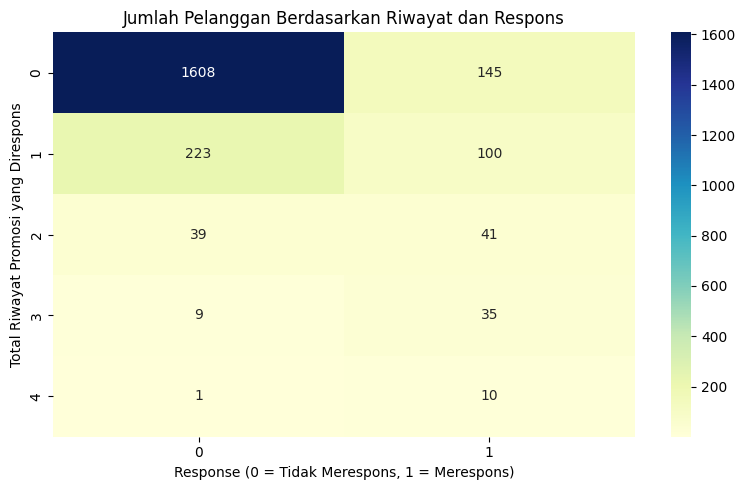

In [129]:
crosstab = pd.crosstab(df['HistoryRespons'], df['Response'])

plt.figure(figsize=(8,5))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')

plt.title('Jumlah Pelanggan Berdasarkan Riwayat dan Respons')
plt.xlabel('Response (0 = Tidak Merespons, 1 = Merespons)')
plt.ylabel('Total Riwayat Promosi yang Direspons')
plt.tight_layout()

plt.savefig('heatpmaphistoryrespons.png', dpi=300)
plt.show()


Dari data Heatmap diatas menggambarkan tentang disitrbusi jumlah pelanggan berdasarkan riwayat promosi yang pernah direspons dan keputusan mereka terhadap promosi terakhir. Warna yagn lebih gelap menunjukkan jumlah pelanggan yang lebih banyak. kita bisa lihat bahwa pleanggan yang tidak pernah merespons, paling banyak beredasa di kategori tidak merespons, sementara pelangan dengan riwayat merespons promosi > 1, cenderung lebih tinggi untuk merespons promosi terakhir. Temuan ini diperkuat oleh hasil uji Chi-Square yang menghasilkan p-vlaue < 0.0001, menunjukkan bahwa ada hubungan yang signifikan antara riwayat respons promosi sebelumnya dengan keputusan merespons promosi selanjutnya (ditunjukkan dari data respons promosi yang terakhir).

### 5. Uji Hipotesis 5: Marital_Status & Education vs Response

In [130]:
# Marital_Status
marital_ct = pd.crosstab(df['Marital_Status'], df['Response'])
chi2_m, p_m, _, _ = stats.chi2_contingency(marital_ct)
print(f"[H5] Chi-square Marital_Status vs Response: p = {p_m:.10f}")
if p_m < 0.05:
    print("Kesimpulan: Marital_Status berpengaruh signifikan terhadap Response")
else:
    print("Kesimpulan: Tidak ada pengaruh signifikan Marital_Status terhadap Response")

# Education
edu_ct = pd.crosstab(df['Education'], df['Response'])
chi2_e, p_e, _, _ = stats.chi2_contingency(edu_ct)
print(f"[H5] Chi-square Education vs Response: p = {p_e:.10f}")
if p_e < 0.05:
    print("Kesimpulan: Education berpengaruh signifikan terhadap Response")
else:
    print("Kesimpulan: Tidak ada pengaruh signifikan Education terhadap Response")


[H5] Chi-square Marital_Status vs Response: p = 0.0000000016
Kesimpulan: Marital_Status berpengaruh signifikan terhadap Response
[H5] Chi-square Education vs Response: p = 0.0001393402
Kesimpulan: Education berpengaruh signifikan terhadap Response


### Visualisasi Hipotesis 5

<Figure size 800x500 with 0 Axes>

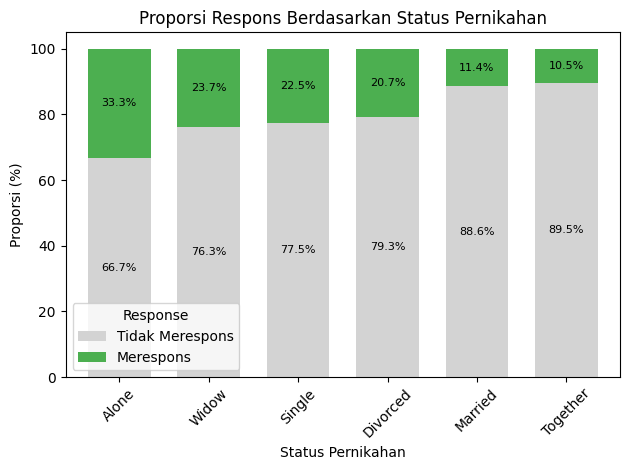

In [141]:
# Marital_Status vs Response
# Crosstab
ct_marital = pd.crosstab(df['Marital_Status'], df['Response'])
ct_percent_marital = ct_marital.div(ct_marital.sum(axis=1), axis=0) * 100
order_marital = ct_percent_marital[1].sort_values(ascending=False).index #srt proporsi

plt.figure(figsize=(8,5))
ax = ct_percent_marital.loc[order_marital].plot(
    kind='bar', 
    stacked=True, 
    color=['#D3D3D3', '#4CAF50'], 
    width=0.7
)

# untuk label persen
for i, marital_status in enumerate(order_marital):
    total = 0
    for j, response in enumerate([0, 1]):
        value = ct_percent_marital.loc[marital_status, response]
        if value > 0:
            ax.text(
                i,                               # posisi X 
                total + value / 2,               # posisi Y 
                f'{value:.1f}%',                 # isi teks
                ha='center', va='center', 
                fontsize=8, color='black'
            )
            total += value
plt.title('Proporsi Respons Berdasarkan Status Pernikahan')
plt.xlabel('Status Pernikahan')
plt.ylabel('Proporsi (%)')
plt.xticks(rotation=45)
plt.legend(['Tidak Merespons', 'Merespons'], title='Response')
plt.tight_layout()
plt.savefig('proporsi_status_pernikahan.png', dpi=300)
plt.show()

Dari hasil uji Chi-Square dan visualisasi ini, terlihat bahwa status pernikahan pelanggan mempengaruhi kecenderungan mereka untuk merespons promosi. Pelanggan dengan status ALONE dan WIDOW menunjukkan respons promosi yang lebih tinggi dibandingkan pelanggan lainnya.
Hubungan ini signifikan secara statistik dengan p-value < 0.001, sehingga bisa dipertimbangkan bahwa target promosi dapat difokuskan pada segmen ALONE dan WIDOW.

<Figure size 800x500 with 0 Axes>

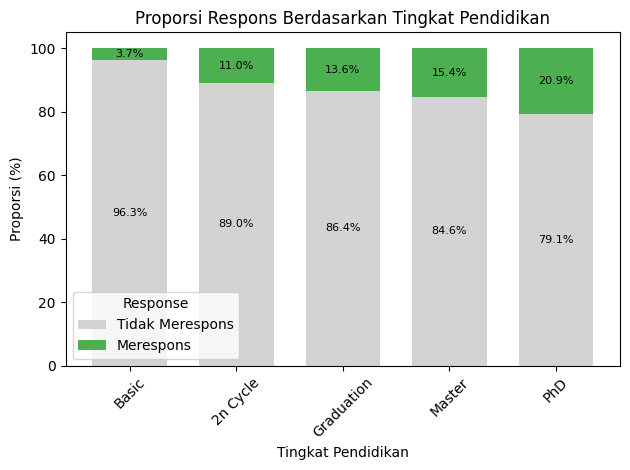

In [157]:
ct_edu = pd.crosstab(df['Education'], df['Response'])
ct_percent_edu = ct_edu.div(ct_edu.sum(axis=1), axis=0) * 100
education_order = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']  #urutan pendidiakn
plt.figure(figsize=(8,5))
ax = ct_percent_edu.loc[education_order].plot(
    kind='bar', 
    stacked=True, 
    color=['#D3D3D3', '#4CAF50'], 
    width=0.7
)
# Menambahkan label persen di tengah bar
for i, education in enumerate(education_order):
    total = 0
    for j, response in enumerate([0, 1]):
        value = ct_percent_edu.loc[education, response]
        if value > 1:  # hanya tampilkan label kalau persentase > 1%
            ax.text(
                i,
                total + value / 2,
                f'{value:.1f}%',
                ha='center', va='center',
                fontsize=8, color='black'
            )
        total += value

plt.title('Proporsi Respons Berdasarkan Tingkat Pendidikan')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Proporsi (%)')
plt.xticks(rotation=45)
plt.legend(['Tidak Merespons', 'Merespons'], title='Response')
plt.tight_layout()
plt.savefig('proporsi_tingkat_pendidikan.png', dpi=300)
plt.show()


Dari hasil uji Chi-Square dan Visualisasi ini menunjukkan bahwa tingkat pendidikan pelanggan memengaruhi peluang mereka untuk merespons promosi. Pelanggan dengan pendidikan lebih tinggi seperti Graduation, 2n Cycle, dan Master memiliki proporsi respons yang lebih besar.
Dengan p-value < 0.001, temuan ini signifikan secara statistik, yang berarti bahwa segmen pelanggan berpendidikan tinggi menjadi target potensial untuk sasaran promosi berikutnya.


### Insight dari Uji Hipotesis:
Berdasarkan hasil uji statistik terhadap lima hipotesis, ditemukan bahwa karakteristik pelanggan seperti pendapatan, aktivitas online, riwayat kampanye sebelumnya, serta demografi memiliki pengaruh signifikan terhadap respons promosi terakhir. Sebaliknya, kebiasaan berbelanja dengan diskon tidak terbukti sebagai faktor pendorong utama dalam respons promosi ini. Temuan ini penting untuk membantu perusahaan memfokuskan strategi pemasaran ke segmen pelanggan yang lebih potensial dan responsif.

### Visualisasi Rekomendasi Final

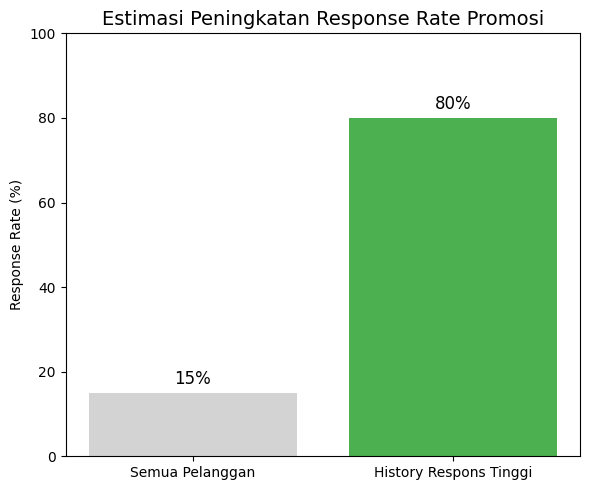

In [133]:
strategi = ['Semua Pelanggan', 'History Respons Tinggi']
response_rates = [15, 80]  # 80% sebagai rata-rata dari 70%-90%
colors = ['#D3D3D3', '#4CAF50']
plt.figure(figsize=(6, 5))
bars = plt.bar(strategi, response_rates, color=colors)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{yval}%', ha='center', fontsize=12)
plt.title('Estimasi Peningkatan Response Rate Promosi', fontsize=14)
plt.ylabel('Response Rate (%)')
plt.ylim(0, 100)  
plt.tight_layout()
plt.savefig('simulasi_response_rate.png', dpi=300)
plt.show()


Dari data diatas menunjukkan, jika promosi ditujukan ke seluruh pelanggan, rata-rata response rate hanya sekitar 15%.
Namun, jika kita mengalihkan fokus promosi ke pelanggan yang memiliki riwayat respons positif, estimasi response rate bisa meningkat hingga sekitar 80%, dengan kisaran antara 70% hingga 90%.
Ini menunjukkan bahwa dengan strategi yang lebih tertata dengan melihat calon pembeli, efektivitas promosi bisa meningkat hingga 5–6 kali lipat, sekaligus membantu mengoptimalkan biaya promosi yang dikeluarkan perusahaan.

In [134]:
# Save DataFrame ke file CSV setelah cleaning data (untuk kebutuhan visualisasi tableau)
df.to_csv('supermarket_tableau.csv', index=False)
